In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
1,2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
2,3,11250,7,2001,920,1786,2,3,Gd,6,608,223500
3,4,9550,7,1915,756,1717,1,3,Gd,7,642,140000
4,5,14260,8,2000,1145,2198,2,4,Gd,9,836,250000


## 1- Comprendiendo las variables

| Variable | Descripciòn |
------------|-------------
| LotArea | Tamaño del lote |
| OverallQual | Valor del material y el acabado de la casa |
| YearBuilt | Año de construcciòn|
| TotalBsmtSF | Àrea del sòtano|
| GrLivArea | Àrea habitable |
| Full bath | Cantidad de baños|
| BedroomAbvGr | Cantidad de habitaciones |
| KitchenQual | Calidad de la cocina |
| TotRmsAbvGrd | Total de cuartos | 
| Garage Area | Tamaño del garage |

In [4]:
df.shape

(1460, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  GarageArea    1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 137.0+ KB


El dataset cuenta con 1640 filas y 12 columnas (variables). Ninguna de las variables tiene datos nulos o faltantes. Solo una de las columnas ('KitchenQual') es de tipo object (categòrica), las restantes son de tipo numèrico discreto.

In [7]:
df.isnull().sum()

Id              0
LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

Corroborando la informaciòn, ninguna columna cuenta con datos nulos o faltantes.

In [9]:
df.describe()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,1971.267808,1057.429452,1515.463699,1.565068,2.866438,6.517808,472.980137,180921.195890
std,421.610009,9981.264932,1.382997,30.202904,438.705324,525.480383,0.550916,0.815778,1.625393,213.804841,79442.502883
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,34900.000000
25%,365.750000,7553.500000,5.000000,1954.000000,795.750000,1129.500000,1.000000,2.000000,5.000000,334.500000,129975.000000
50%,730.500000,9478.500000,6.000000,1973.000000,991.500000,1464.000000,2.000000,3.000000,6.000000,480.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,2000.000000,1298.250000,1776.750000,2.000000,3.000000,7.000000,576.000000,214000.000000
max,1460.000000,215245.000000,10.000000,2010.000000,6110.000000,5642.000000,3.000000,8.000000,14.000000,1418.000000,755000.000000


| Variable | Descripciòn | Tipo de dato | Categoria | Tipo de Variable|
------------|--------------|--------------|---------|------------------|
| LotArea | Tamaño del lote | Numèrico | Discreto | Independiente |
| OverallQual | Valor del material y el acabado de la casa | Numèrico | Discreto | Independiente |
| YearBuilt | Año de construcciòn| Numèrico | Discreto | Independiente |
| TotalBsmtSF | Àrea del sòtano| Numèrico | Discreto | Independiente |
| GrLivArea | Àrea habitable | Numèrico | Discreto | Independiente |
| Full bath | Cantidad de baños| Numèrico | Discreto | Independiente |
| BedroomAbvGr | Cantidad de habitaciones | Numèrico | Discreto | Independiente |
| KitchenQual | Calidad de la cocina | Categòrico | Nominal | Independiente |
| TotRmsAbvGrd | Total de cuartos | Numèrico | Discreto | Independiente |
| Garage Area | Tamaño del garage | Numèrico | Discreto | Dependiente |

## 2- Explorando la variable independiente

In [10]:
df.corr()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
Id,1.000000,-0.033226,-0.028365,-0.012713,-0.015415,0.008273,0.005587,0.037719,0.027239,0.017634,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.014228,0.260833,0.263116,0.126031,0.119690,0.190015,0.180403,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.572323,0.537808,0.593007,0.550600,0.101676,0.427452,0.562022,0.790982
YearBuilt,-0.012713,0.014228,0.572323,1.000000,0.391452,0.199010,0.468271,-0.070651,0.095589,0.478954,0.522897
TotalBsmtSF,-0.015415,0.260833,0.537808,0.391452,1.000000,0.454868,0.323722,0.050450,0.285573,0.486665,0.613581
GrLivArea,0.008273,0.263116,0.593007,0.199010,0.454868,1.000000,0.630012,0.521270,0.825489,0.468997,0.708624
FullBath,0.005587,0.126031,0.550600,0.468271,0.323722,0.630012,1.000000,0.363252,0.554784,0.405656,0.560664
BedroomAbvGr,0.037719,0.119690,0.101676,-0.070651,0.050450,0.521270,0.363252,1.000000,0.676620,0.065253,0.168213
TotRmsAbvGrd,0.027239,0.190015,0.427452,0.095589,0.285573,0.825489,0.554784,0.676620,1.000000,0.337822,0.533723
GarageArea,0.017634,0.180403,0.562022,0.478954,0.486665,0.468997,0.405656,0.065253,0.337822,1.000000,0.623431


Se observa que dos variables (LotArea, BedroomAbvGr) no tienen una fuerte relaciòn con respecto a la variable dependiente (SalePrice) ya que son muy cercanas a 0. A diferencia del resto de variables que son mayores a 0.5 lo que indica que tienen una fuerte relacion directa.

## 3 - Relación entre la variable dependiente y las variables independientes

In [20]:
df.columns

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea',
       'SalePrice'],
      dtype='object')

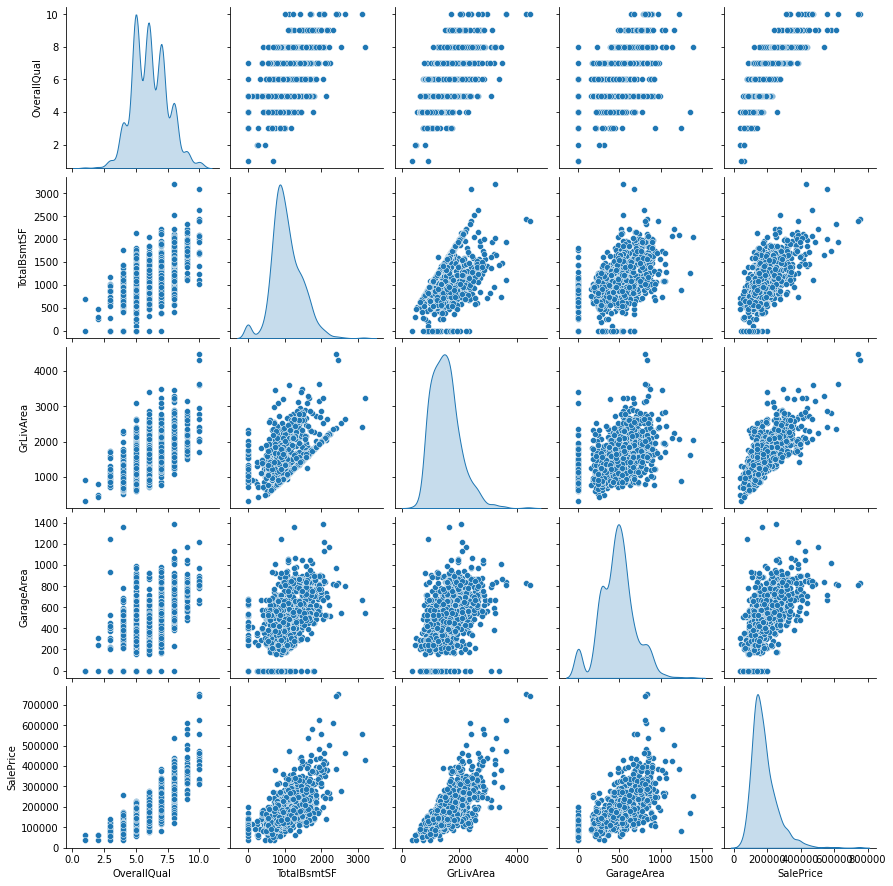

In [63]:
sns.pairplot(df[['OverallQual', 'TotalBsmtSF', 'GrLivArea','GarageArea',
       'SalePrice']], diag_kind='kde')

## 4- Limpiando el dataset

Saleprice vs OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

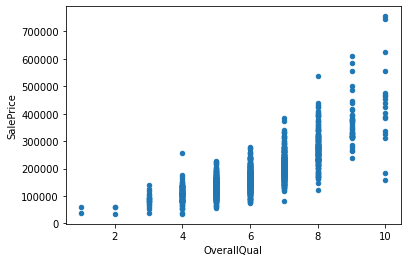

In [23]:
df.plot.scatter(x= 'OverallQual', y = 'SalePrice')

La calidad baja de la casa corresponde a un precio bajo de la misma. Aunque la grafica muestra que existen casas con alta calidad que pueden ser de bajo y alto costo.

SalePrice vs TotalBsmtSF

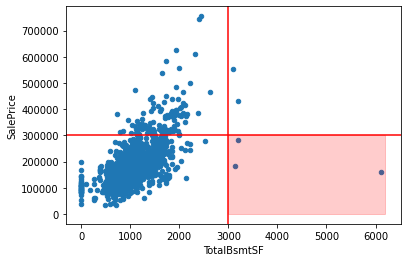

In [44]:
df.plot.scatter( x= 'TotalBsmtSF', y ='SalePrice')
plt.axvline(3000, color = 'r')
plt.axhline(300000, color ='r')
plt.fill([3000,3000,6200,6200],[0,300000,300000,0], color= 'r', alpha= 0.2)

Se observan outliers dentro de la gràfica, se procede a eliminarlos.

In [46]:
df.loc[(df['TotalBsmtSF']> 3000) & (df['SalePrice']<300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
332,333,10655,8,2003,3206,1629,2,3,Gd,7,880,284000
523,524,40094,10,2007,3138,4676,3,3,Ex,11,884,184750
1298,1299,63887,10,2008,6110,5642,2,3,Ex,12,1418,160000


In [47]:
df = df.drop([332,523,1298])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

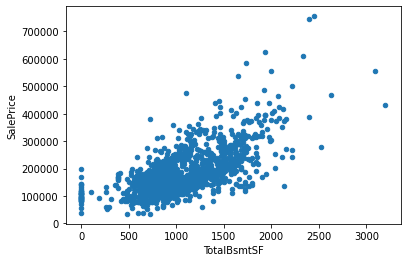

In [48]:
df.plot.scatter( x= 'TotalBsmtSF', y ='SalePrice')

Se puede observar que los outliers son eliminados y ya no se evidencian en la grafica.

SalePrice vs GrLivArea

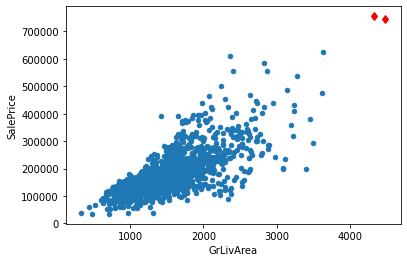

In [62]:
df.plot.scatter(x = 'GrLivArea', y= 'SalePrice')
plt.plot(4316, 755000, marker= 'd',color='r', )
plt.plot(4476,745000, marker= 'd',color='r')

Para esta gráfica, se observa que existen dos datos bastantes alejados de los demás (identificados de color rojo y con forma de rombo), podrian considerarse outliers pero como siguen la misma relacion que el resto, pueden conservarse.

SalePrice vs GarageArea

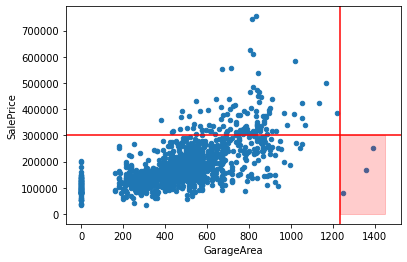

In [72]:
df.plot.scatter(x = 'GarageArea', y = 'SalePrice')
plt.axvline(1235, color = 'r')
plt.axhline(300000, color = 'r')
plt.fill([1235,1235,1450,1450], [0,300000,300000,0], color='r', alpha=0.2)

En esta gràfica, existen 3 valores atipicos que se encuentran bastante alejados del resto y no corresponden con la relacion que lleva el resto de los datos. Por esa razon se procede a eliminarlos.

In [73]:
df.loc[(df['GarageArea']> 1200) & (df['SalePrice']< 300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
581,582,12704,8,2008,2042,2042,2,3,Ex,8,1390,253293
1061,1062,18000,3,1935,894,894,1,2,TA,6,1248,81000
1190,1191,32463,4,1961,1249,1622,1,3,TA,7,1356,168000


In [74]:
df=df.drop([581,1061,1190])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

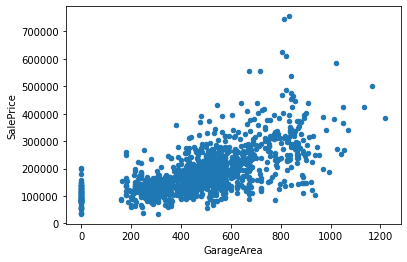

In [75]:
df.plot.scatter(x = 'GarageArea', y = 'SalePrice')

## 5- Suposiciones estadísticas.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

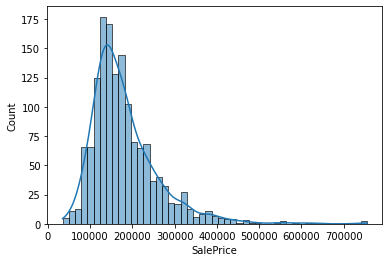

In [76]:
sns.histplot(df['SalePrice'], kde=True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74176.35324560651, 180889.89202200828, 0.9315857338304129))

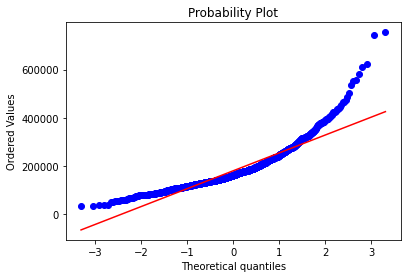

In [77]:
stats.probplot(df['SalePrice'], plot= plt)

Las gráficas demuestran que la variable dependiente no esta normalmente distribuida. Está sesgada al lado derecho de la gráfica.

In [78]:
df['SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

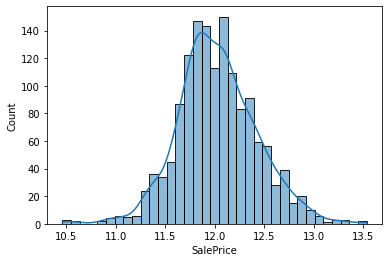

In [79]:
sns.histplot(df['SalePrice'], kde=True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3981951526590826, 12.023845716834316, 0.9952772349085537))

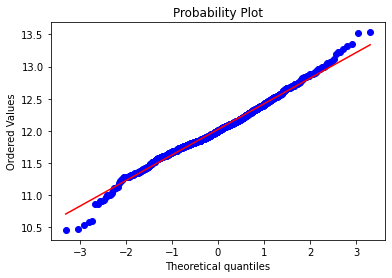

In [80]:
stats.probplot(df['SalePrice'], plot= plt)

Ahora la variable dependiente se encuentra normalmente distribuida, transformando sus datos.

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

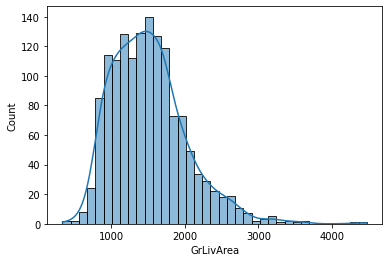

In [82]:
sns.histplot(df['GrLivArea'], kde=True)


((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.8744641091574, 1510.365887207703, 0.9743017218385451))

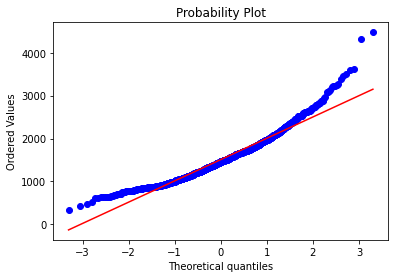

In [83]:
stats.probplot(df['GrLivArea'], plot= plt)

La variable del area habitable tampoco se encuentra normalmente distribuida, por lo que se procede a transformar los datos para cambiar su distribución.

In [85]:
df['GrLivArea'] = np.log(df['GrLivArea'])

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.33039107569642506, 7.265927014995005, 0.9981704176655277))

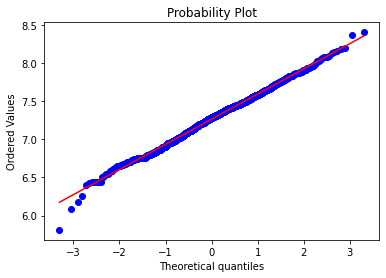

In [86]:
stats.probplot(df['GrLivArea'], plot=plt)

Ahora se analiza la variable categorica.

In [87]:
df['KitchenQual'].value_counts()

TA    733
Gd    585
Ex     97
Fa     39
Name: KitchenQual, dtype: int64

<BarContainer object of 4 artists>

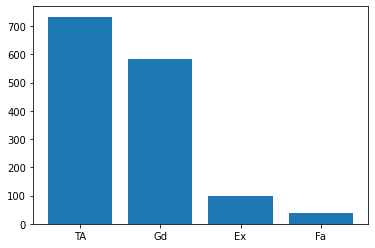

In [93]:
plt.bar(df['KitchenQual'].value_counts().index,df['KitchenQual'].value_counts())

In [94]:
kitchen = pd.get_dummies(df['KitchenQual'])
kitchen.head()

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [95]:
df = df.join(kitchen)
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,Gd,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,TA,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,Gd,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,Gd,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,Gd,9,836,12.429216,0,0,1,0


In [96]:
df = df.drop('KitchenQual', axis=1)

In [97]:
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,9,836,12.429216,0,0,1,0


In [100]:
df = df[['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea','Ex', 'Fa', 'Gd', 'TA', 'SalePrice',
       ]]

In [101]:
df

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,Ex,Fa,Gd,TA,SalePrice
0,1,8450,7,2003,856,7.444249,2,3,8,548,0,0,1,0,12.247694
1,2,9600,6,1976,1262,7.140453,2,3,6,460,0,0,0,1,12.109011
2,3,11250,7,2001,920,7.487734,2,3,6,608,0,0,1,0,12.317167
3,4,9550,7,1915,756,7.448334,1,3,7,642,0,0,1,0,11.849398
4,5,14260,8,2000,1145,7.695303,2,4,9,836,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,1999,953,7.406711,2,3,7,460,0,0,0,1,12.072541
1456,1457,13175,6,1978,1542,7.636752,2,3,7,500,0,0,0,1,12.254863
1457,1458,9042,7,1941,1152,7.757906,2,4,9,252,0,0,1,0,12.493130
1458,1459,9717,5,1950,1078,6.982863,1,2,5,240,0,0,1,0,11.864462


Con todo esto, el dataset esta listo para implementar algun algoritmo de machine learning para predecir el costo de una vivienda segun sus caracteristicas.